In [1]:
import os
import glob
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
from functools import partial


class Kmeans:
    def __init__(self, img, k=5, max_iter=50, threshold=1e-4):
        self.img = img
        self.k = k
        self.max_iter = max_iter
        self.threshold = threshold

        self.pixels = img.reshape(-1, 3)
        self.centroids = self.pixels[np.random.choice(self.pixels.shape[0], k, replace=False)]

    def euclidean_distance(self):
        return np.linalg.norm(self.pixels[:, np.newaxis] - self.centroids, axis=2)

    def assign_pixels_to_clusters(self):
        distances = self.euclidean_distance()
        return np.argmin(distances, axis=1)

    def update_centroids(self, cluster_indices):
        new_centroids = []
        for indices in cluster_indices:
            if len(indices) > 0:
                new_centroids.append(np.mean(self.pixels[indices], axis=0))
            else:
                new_centroids.append(self.pixels[np.random.choice(len(self.pixels))])
        return np.array(new_centroids)

    def fit(self):
        for _ in range(self.max_iter):
            labels = self.assign_pixels_to_clusters()
            cluster_indices = [np.where(labels == i)[0] for i in range(self.k)]
            new_centroids = self.update_centroids(cluster_indices)
            if np.max(np.abs(self.centroids - new_centroids)) <= self.threshold:
                break
            else:
                self.centroids = new_centroids
        return labels


def process_image(image_path, output_folder, k=20, max_cluster=5):
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    try:
        img = mpimg.imread(image_path)

        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)

        if img.shape[-1] == 4:  # Remove alpha if present
            img = img[:, :, :3]

        height, width = img.shape[:2]

        kmeans = Kmeans(img, k=k, max_iter=50, threshold=1e-4)
        labels = kmeans.fit()
        labels_reshaped = labels.reshape((height, width))

        unique_clusters, counts = np.unique(labels_reshaped, return_counts=True)
        clusters = sorted({cluster: count for cluster, count in zip(unique_clusters, counts)}.items(), key=lambda x: x[1])
        small_clusters = [cluster for cluster, _ in clusters[:max_cluster]]

        mask = np.isin(labels_reshaped, small_clusters)
        highlighted = np.zeros_like(img)
        highlighted[mask] = img[mask]

        combined = np.concatenate((img, highlighted), axis=1)
        output_img = Image.fromarray(combined)
        output_img.save(os.path.join(output_folder, f"{image_name}_MOhamed_ARef.png"))

        return f"✅ Processed: {image_name}"

    except Exception as e:
        return f"❌ Failed: {image_name} - {e}"


def main():
    image_folder = 'test'
    output_folder = 'output'
    os.makedirs(output_folder, exist_ok=True)

    image_paths = glob.glob(os.path.join(image_folder, '*'))
    worker_func = partial(process_image, output_folder=output_folder, k=20, max_cluster=5)

    with ProcessPoolExecutor() as executor:
        results = list(tqdm(executor.map(worker_func, image_paths), total=len(image_paths), desc="Processing images"))

    for r in results:
        print(r)


if __name__ == '__main__':
    main()


Processing images: 100%|██████████| 4/4 [00:30<00:00,  7.70s/it]

✅ Processed: image3
✅ Processed: image4
✅ Processed: image1
✅ Processed: image2


Showing: image1_highlighted.png


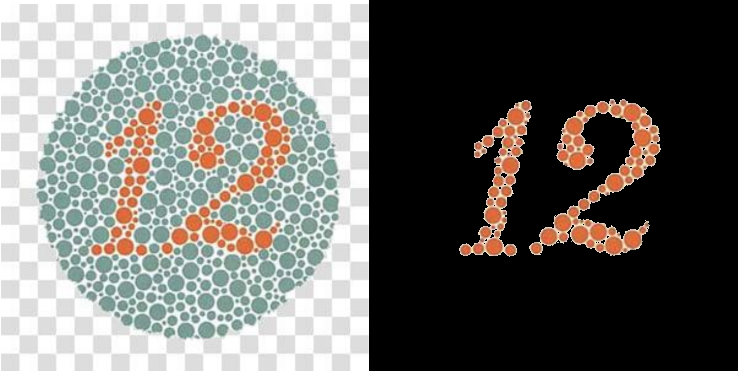

Showing: image2_highlighted.png


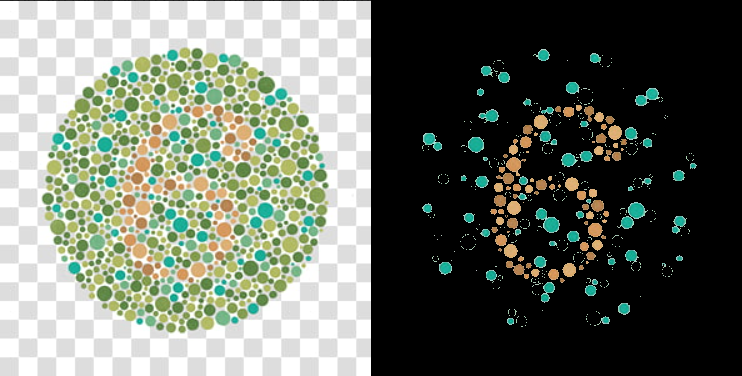

Showing: image3_highlighted.png


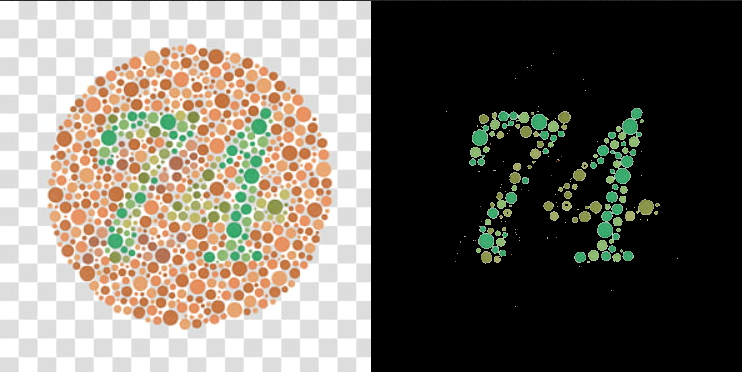

Showing: image4_highlighted.png


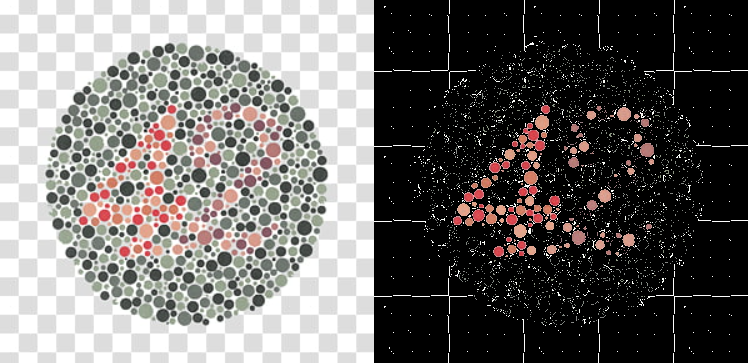

In [2]:
import os
from IPython.display import Image, display
import glob

# Folder containing output images
output_folder = 'output'

# Get all image file paths (adjust the pattern if needed)
image_paths = sorted(glob.glob(os.path.join(output_folder, '*.*')))

# Display images
for path in image_paths:
    print(f"Showing: {os.path.basename(path)}")
    display(Image(filename=path))


In [5]:
import os
import glob
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
from tqdm import tqdm
from concurrent.futures import ProcessPoolExecutor
from functools import partial


class Kmeans:
    def __init__(self, img, k=5, max_iter=50, threshold=1e-4):
        self.img = img
        self.k = k
        self.max_iter = max_iter
        self.threshold = threshold

        self.pixels = img.reshape(-1, 3)
        self.centroids = self.pixels[np.random.choice(self.pixels.shape[0], k, replace=False)]

    def euclidean_distance(self):
        return np.linalg.norm(self.pixels[:, np.newaxis] - self.centroids, axis=2)

    def assign_pixels_to_clusters(self):
        distances = self.euclidean_distance()
        return np.argmin(distances, axis=1)

    def update_centroids(self, cluster_indices):
        new_centroids = []
        for indices in cluster_indices:
            if len(indices) > 0:
                new_centroids.append(np.mean(self.pixels[indices], axis=0))
            else:
                new_centroids.append(self.pixels[np.random.choice(len(self.pixels))])
        return np.array(new_centroids)

    def fit(self):
        for _ in range(self.max_iter):
            labels = self.assign_pixels_to_clusters()
            cluster_indices = [np.where(labels == i)[0] for i in range(self.k)]
            new_centroids = self.update_centroids(cluster_indices)
            if np.max(np.abs(self.centroids - new_centroids)) <= self.threshold:
                break
            else:
                self.centroids = new_centroids
        return labels


def process_image(image_path, output_folder, k=20, max_cluster=5):
    image_name = os.path.splitext(os.path.basename(image_path))[0]
    try:
        img = mpimg.imread(image_path)

        if img.dtype != np.uint8:
            img = (img * 255).astype(np.uint8)

        if img.shape[-1] == 4:  # Remove alpha if present
            img = img[:, :, :3]

        height, width = img.shape[:2]

        kmeans = Kmeans(img, k=k, max_iter=50, threshold=1e-4)
        labels = kmeans.fit()
        labels_reshaped = labels.reshape((height, width))

        unique_clusters, counts = np.unique(labels_reshaped, return_counts=True)
        clusters = sorted({cluster: count for cluster, count in zip(unique_clusters, counts)}.items(), key=lambda x: x[1])
        small_clusters = [cluster for cluster, _ in clusters[:max_cluster]]

        mask = np.isin(labels_reshaped, small_clusters)
        highlighted = np.zeros_like(img)
        highlighted[mask] = img[mask]

        combined = np.concatenate((img, highlighted), axis=1)
        output_img = Image.fromarray(combined)
        output_img.save(os.path.join(output_folder, f"{image_name}_MOhamed_ARef.png"))

        return f"✅ Processed: {image_name}"

    except Exception as e:
        return f"❌ Failed: {image_name} - {e}"


def main():
    image_folder = 'test'
    output_folder = 'output2'
    os.makedirs(output_folder, exist_ok=True)

    image_paths = glob.glob(os.path.join(image_folder, '*'))
    worker_func = partial(process_image, output_folder=output_folder, k=20, max_cluster=5)

    with ProcessPoolExecutor() as executor:
        results = list(tqdm(executor.map(worker_func, image_paths), total=len(image_paths), desc="Processing images"))

    for r in results:
        print(r)


if __name__ == '__main__':
    main()


Processing images: 100%|██████████| 4/4 [00:27<00:00,  6.80s/it]

✅ Processed: image3
✅ Processed: image4
✅ Processed: image1
✅ Processed: image2
